In [2]:
%cd /content/drive/MyDrive/Business Analytics

/content/drive/MyDrive/Business Analytics


In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
#Loading the data
data = pd.read_csv('salaries.csv')
print(data.shape)
data.head()

(397, 6)


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


**Data exploration and manipulation**


In [9]:
#Describe data
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [5]:
#Check for missing values in the dataset
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [12]:
#Summary statistics
data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [11]:
#Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)


Categorical columns:
Index(['rank', 'discipline', 'sex'], dtype='object')


In [13]:
#Convert categorical columns into dummy variables
data['rank'] = data['rank'].map({'Prof': 0, 'AsstProf': 1, 'AssocProf': 2})
data['discipline'] = data['discipline'].map({'A': 0, 'B': 1})
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0,1,19,18,0,139750
1,0,1,20,16,0,173200
2,1,1,4,3,0,79750
3,0,1,45,39,0,115000
4,0,1,40,41,0,141500


                   rank  discipline  yrs.since.phd  yrs.service       sex  \
rank           1.000000    0.086266      -0.525500    -0.447499  0.132492   
discipline     0.086266    1.000000      -0.218087    -0.164599 -0.003724   
yrs.since.phd -0.525500   -0.218087       1.000000     0.909649 -0.148788   
yrs.service   -0.447499   -0.164599       0.909649     1.000000 -0.153740   
sex            0.132492   -0.003724      -0.148788    -0.153740  1.000000   
salary        -0.522207    0.156084       0.419231     0.334745 -0.138610   

                 salary  
rank          -0.522207  
discipline     0.156084  
yrs.since.phd  0.419231  
yrs.service    0.334745  
sex           -0.138610  
salary         1.000000  


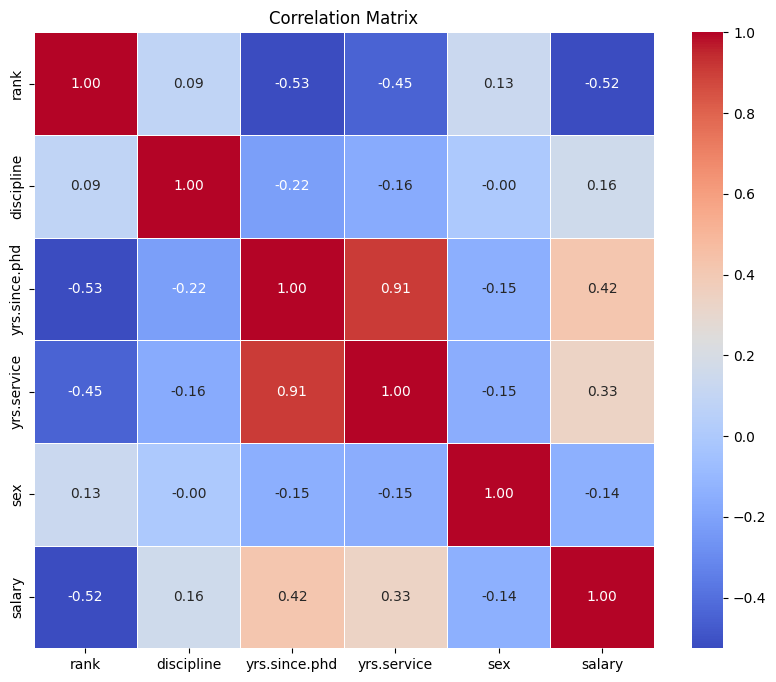

In [15]:
#Compute the correlation matrix
correlation_matrix = data.corr()

#Display the correlation matrix
print(correlation_matrix)

#Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Salary')

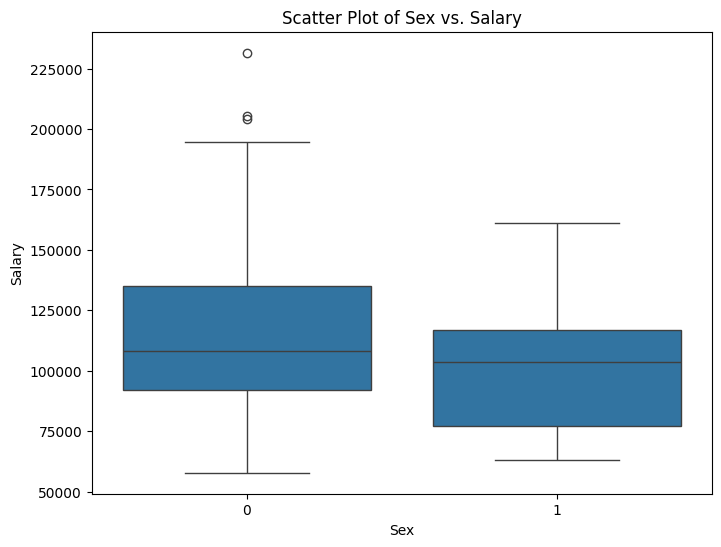

In [18]:
#Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='salary', data=data)
plt.title('Scatter Plot of Sex vs. Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')

On this boxplot, we can see that depending on the gender of someone, the salary is changing. Overall, the salary of a man tends to be higher than that of a woman. (male = 0, female= 1)

**Multilinear regression model**

In [20]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data)

#Define features and target variable
X = df.drop('salary', axis=1) #Features
y = df['salary']              #Target variable

#Exclude the target variable ('salary') if you're not standardizing it
X = df.drop(columns=['salary'])

#Scale the features
scaler = StandardScaler()

#Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [21]:
import statsmodels.api as sm

#Prepare X and Y
y = df['salary']
X_standardized = sm.add_constant(X)

In [22]:
#Convert to a dataframe
X_standardized = pd.DataFrame(X_standardized, columns= X.columns)

#Display the standardized dataset
X_standardized.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0,1,19,18,0
1,0,1,20,16,0
2,1,1,4,3,0
3,0,1,45,39,0
4,0,1,40,41,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [25]:
#Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Create and train multilinear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Regression model
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     45.05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           6.55e-35
Time:                        02:22:36   Log-Likelihood:                -3640.2
No. Observations:                 317   AIC:                             7292.
Df Residuals:                     311   BIC:                             7315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.143e+05   1334.405     85.657      0.0

In [29]:
#Exclude the target variable ('salary') if you're not standardizing it
X = df.drop(columns=['salary'])

#Scale the features
scaler = StandardScaler()

#Fit and transform the features
X_standardized = scaler.fit_transform(X)

#Convert to a dataframe
X_standardized = pd.DataFrame(X_standardized, columns= X.columns)

#Prepare X and Y
y = df['salary']
X_standardized = sm.add_constant(X)

#Training and test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standardized, y, test_size=0.2, random_state=1502)

#Regression model
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     38.96
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           5.10e-31
Time:                        02:23:57   Log-Likelihood:                -3638.9
No. Observations:                 317   AIC:                             7290.
Df Residuals:                     311   BIC:                             7312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.009e+05   4377.549     23.057

In [30]:
#Predictions for multilinear regression model
predictions_multilinear = model.predict(X_test1)

In [31]:
predictions_multilinear

,0
364,121692.158721
30,132791.686453
378,119278.284422
188,96093.976541
155,128022.604496
...,...
343,132850.353094
366,109815.667902
79,104439.919816
135,111244.819048


In [32]:
results_multilinear = pd.DataFrame({
    'Actual': y_test1.values.astype(int),
   'Predicted': predictions_multilinear.astype(int)})

In [33]:
results_multilinear

,Actual,Predicted
364,205500,121692
30,132261,132791
378,150680,119278
188,106300,96093
155,118971,128022
...,...,...
343,162150,132850
366,115435,109815
79,84240,104439
135,136000,111244


In [35]:
#Accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", round(mean_absolute_error(y_test1, predictions_multilinear), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test1, predictions_multilinear)), 0))

MAE: 20697.0
RMSE: 26494.0


In [66]:
#Extract p-values from the model summary
p_values = model.pvalues

#Identify statistically significant features (p-value < 0.05)
significant_features = p_values[p_values < 0.05].index

#Print the statistically significant features
print("Statistically Significant Features (p-value < 0.05):")
print(significant_features)

Statistically Significant Features (p-value < 0.05):
Index(['const', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service'], dtype='object')


In [70]:
#Subset the training and test data to include only significant features
X_train_significant = X_train[:, p_values [1:] < 0.05]  # Extracting the columns with significant p-values
X_test_significant = X_test[:, p_values [1:] < 0.05]

# Initialize and train a new Linear Regression model with significant features
linear_model_significant = LinearRegression()
linear_model_significant.fit(X_train_significant, y_train)

#Make predictions using the significant feature model
y_pred_significant = linear_model_significant.predict(X_test_significant)

#Evaluate the new model performance using MAE and RMSE
mae_significant = mean_absolute_error(y_test, y_pred_significant)
rmse_significant = np.sqrt(mean_squared_error(y_test, y_pred_significant))

#Print the evaluation metrics for the new model
print(f"Significant Features Model - MAE: {mae_significant}")
print(f"Significant Features Model - RMSE: {rmse_significant}")

Significant Features Model - MAE: 19367.58832744188
Significant Features Model - RMSE: 26276.43317719195


The lower MAE indicates that, on average, Model 2's predictions are closer to the actual values, while the lower RMSE shows that Model 2 is slightly better at handling large errors.
The improvement in performance from Model 1 to Model 2 suggests that by focusing on the statistically significant features (those with p-value < 0.05), the model is able to make more accurate and reliable predictions. This fine-tuning step helps the model focus on the most important features, which likely eliminates noise from irrelevant features.

**Tree regression model**

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
#Training and test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=1502)

In [38]:
#Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

#Train the model
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [39]:
#Get feature importance
feature_importance = tree_model.feature_importances_

In [40]:
#Create a DataFrame to display feature importance alongside feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
0           rank    0.438741
2  yrs.since.phd    0.252453
3    yrs.service    0.214995
1     discipline    0.074614
4            sex    0.019196


In [41]:
df2 = df.drop(columns= ['discipline', 'sex'])

In [42]:
X2 = df2.drop(columns=['salary'])

In [43]:
#Training and test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=1502)

#Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

#Train the model
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [44]:
#Make predictions on the test set
predictions_tree = tree_model.predict(X_test2)

In [45]:
#Results for tree regression
results_tree = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int)})

In [46]:
results_multilinear

,Actual,Predicted
364,205500,121692
30,132261,132791
378,150680,119278
188,106300,96093
155,118971,128022
...,...,...
343,162150,132850
366,115435,109815
79,84240,104439
135,136000,111244


In [47]:
#Calculate performance metrics for tree regression
print("MAE:", round(mean_absolute_error(y_test2, predictions_tree), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test2, predictions_tree)), 0))

MAE: 21070.0
RMSE: 29946.0


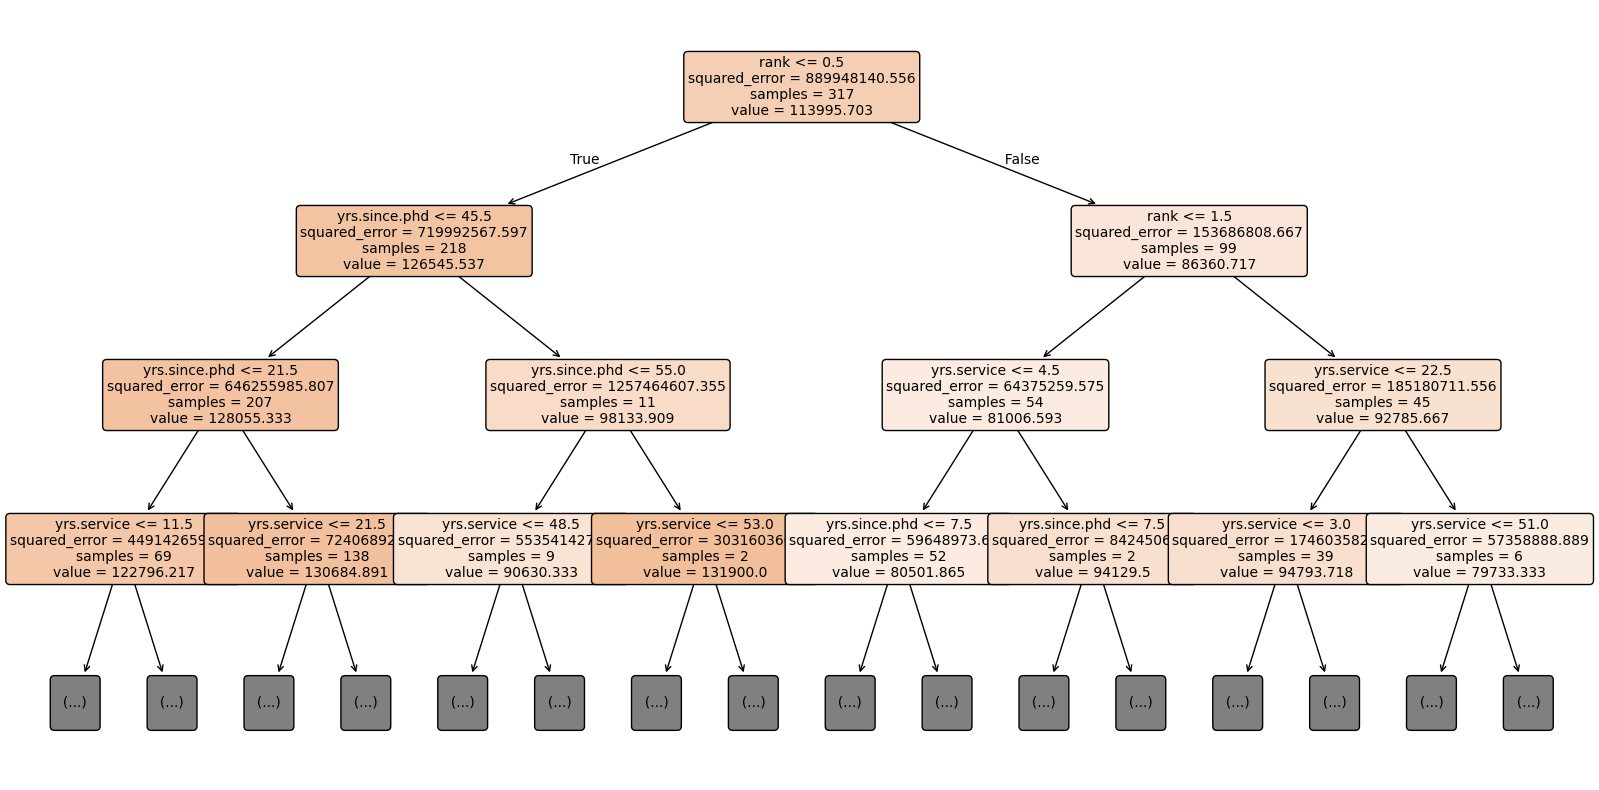

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X2.columns, max_depth=3, filled=True, rounded=True, fontsize=10)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
#Assuming df is the DataFrame and 'price' is the target variable
target_variable = 'salary'

#Features (X) and target (y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Optional: Standardize the features (if necessary, for models like Linear Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
#Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
#Make predictions on the test set
y_pred = rf_model.predict(X_test)

#Evaluate the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 17518.44945327381
Root Mean Squared Error (RMSE): 23758.93946974651


**Comparing the models**

Model 3 consistently outperforms the others with both the lowest MAE (17,518.45) and the lowest RMSE (23,758.94). This suggests it is the most balanced model, having both lower average errors and lower large errors. Model 1 has a slightly higher MAE and RMSE, which makes it the second-best model. However, the difference between Model 1 and Model 3 is not very large, which indicates that both models are quite close in performance.
Model 2 has the highest MAE and RMSE, which suggests that it is the least accurate model in predicting the target variable. It may be overfitting, underfitting, or not capturing the underlying relationships as well as the other two models.